<a href="https://colab.research.google.com/github/shunnyK/AI/blob/main/breast_cancerDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0           0        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           2        19.69         21.25          130.00     1203.0   
3           3        11.42         20.38           77.58      386.1   
4           4        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry  ...  worst texture  worst perimeter  worst area  \
0         0.2419  ...          17.33     

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8279 - loss: 0.4357 - val_accuracy: 0.9121 - val_loss: 0.2275
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9451 - loss: 0.1701 - val_accuracy: 0.9341 - val_loss: 0.1658
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.0941 - val_accuracy: 0.9560 - val_loss: 0.1463
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9804 - loss: 0.0751 - val_accuracy: 0.9560 - val_loss: 0.1362
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9761 - loss: 0.0630 - val_accuracy: 0.9560 - val_loss: 0.1232
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9951 - loss: 0.0353 - val_accuracy: 0.9560 - val_loss: 0.1216
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9958 - loss: 0.0292 - val_accuracy: 0.9451 - val_loss: 0.1217
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9925 - loss: 0.0345 - val_accuracy: 0.9560 - val_loss: 0.1166
Ep

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

=== Confusion Matrix ===
[[41  1]
 [ 0 72]]


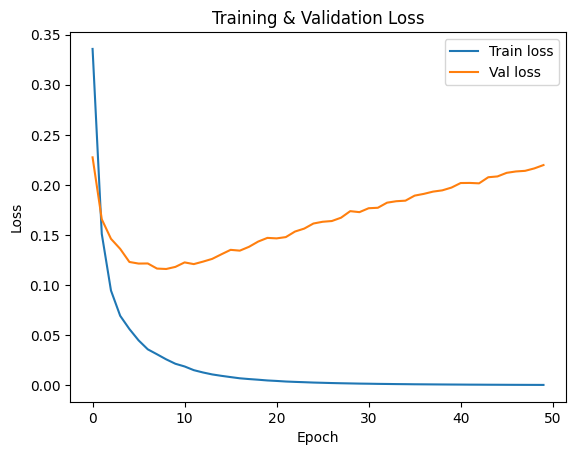

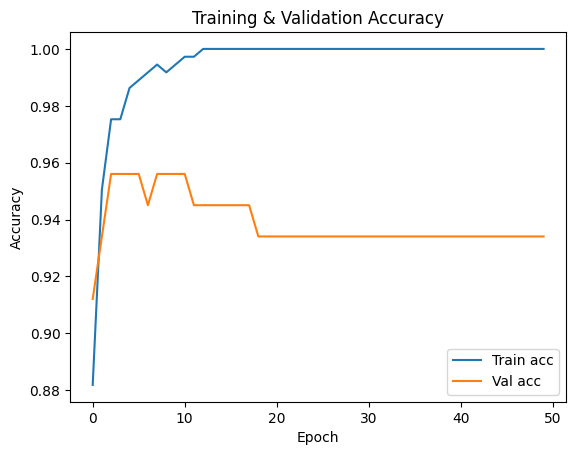

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

# ===== 1. 데이터 불러오기 =====
path = "/content/drive/MyDrive/breast_cancer.csv"   # 사용자 환경에 맞게 경로 조정
df = pd.read_csv(path)

print(df.head())

# ===== 2. 입력/타깃 분리 =====
# (가정) 마지막 컬럼이 label (ex: diagnosis, target 등)
X = df.drop(columns=['label']).values
y = df['label'].values

# 문자열 라벨이면 정수로 변환 (M=0, B=1 같은 식)
le = LabelEncoder()
y_int = le.fit_transform(y)

# 원-핫 인코딩
num_classes = len(np.unique(y_int))
y_cat = to_categorical(y_int, num_classes=num_classes)

# ===== 3. 학습/테스트 분할 =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)

# ===== 4. 스케일링 =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ===== 5. Fully Connected Neural Network =====
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # FC
    layers.Dense(32, activation="relu"),                                   # FC
    layers.Dense(num_classes, activation="softmax")                        # FC (출력층)
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ===== 6. 학습 =====
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# ===== 7. 평가 =====
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=[str(cls) for cls in le.classes_]))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_true, y_pred))

# ===== 8. 학습 곡선 =====
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend(); plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend(); plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')